In [1]:
%store -r climate_df

In [2]:
# Import libraries
import earthpy # Manage local data
import pandas as pd # Work with vector format data
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression
# Addition for OLS Linear Regression
import numpy as np

In [3]:
climate_df

,STATION,TOBS
DATE,,
1856-01-01,USC00458773,NaN
1856-01-02,USC00458773,NaN
1856-01-03,USC00458773,NaN
1856-01-04,USC00458773,NaN
1856-01-05,USC00458773,NaN
...,...,...
2025-06-26,USC00458773,56.0
2025-06-27,USC00458773,60.0
2025-06-28,USC00458773,61.0


<Axes: ylabel='Frequency'>

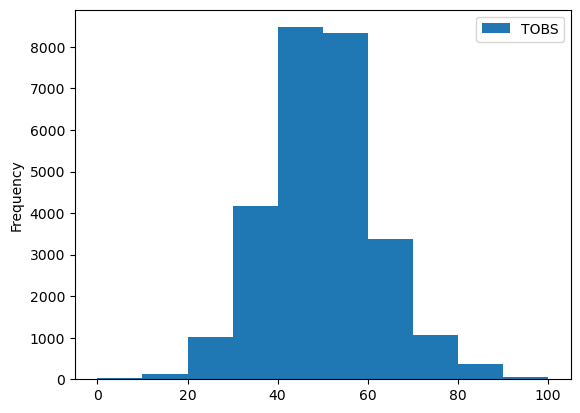

In [4]:
# Take a look at the contents of the dataframe
climate_df.plot.hist()

In [5]:
# Remove station column from dataframe
van_climate_df = climate_df[["TOBS"]]
van_climate_df

,TOBS
DATE,
1856-01-01,NaN
1856-01-02,NaN
1856-01-03,NaN
1856-01-04,NaN
1856-01-05,NaN
...,...
2025-06-26,56.0
2025-06-27,60.0
2025-06-28,61.0


In [6]:
# Rename the temperature column to reflect the unit of measure
van_climate_df_units = van_climate_df.rename(columns={
    'TOBS': 'temp_f',
})

van_climate_df_units

,temp_f
DATE,
1856-01-01,NaN
1856-01-02,NaN
1856-01-03,NaN
1856-01-04,NaN
1856-01-05,NaN
...,...
2025-06-26,56.0
2025-06-27,60.0
2025-06-28,61.0


In [7]:
# Add a column converting the temperature data to degrees Celsius
van_climate_df_units['temp_c'] = (van_climate_df_units['temp_f'] - 32) * 5 / 9 
van_climate_df_units

,temp_f,temp_c
DATE,,
1856-01-01,NaN,NaN
1856-01-02,NaN,NaN
1856-01-03,NaN,NaN
1856-01-04,NaN,NaN
1856-01-05,NaN,NaN
...,...,...
2025-06-26,56.0,13.333333
2025-06-27,60.0,15.555556
2025-06-28,61.0,16.111111


<Axes: xlabel='DATE'>

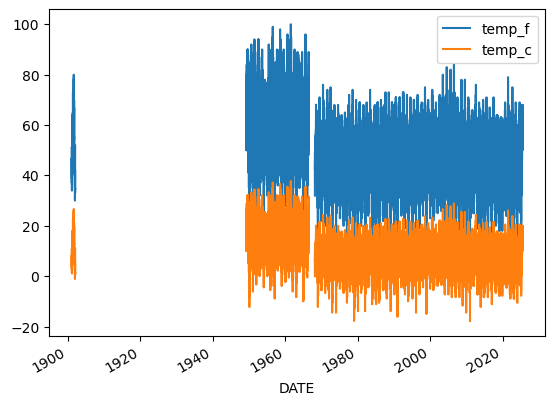

In [8]:
van_climate_df_units.plot()

<Axes: title={'center': 'Daily Temperature in Vancouver WA'}, xlabel='Year', ylabel='Temperature (degrees C)'>

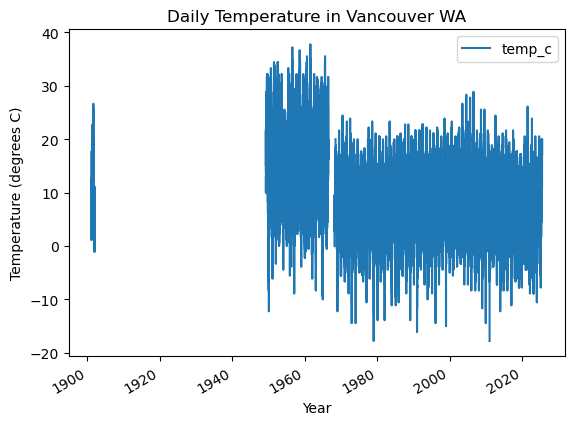

In [9]:
# Plot all the data
van_climate_df_units.plot(
    y='temp_c',
    title='Daily Temperature in Vancouver WA',
    xlabel='Year',
    ylabel='Temperature (degrees C)'
)

In [10]:
# Downsample the data to replot
van_ann_climate_df = (
    van_climate_df_units
    .resample('YE')  # 'YE' = year-end frequency
    .mean()
)
van_ann_climate_df

,temp_f,temp_c
DATE,,
1856-12-31,NaN,NaN
1857-12-31,NaN,NaN
1858-12-31,NaN,NaN
1859-12-31,NaN,NaN
1860-12-31,NaN,NaN
...,...,...
2021-12-31,45.715068,7.619482
2022-12-31,44.758904,7.088280
2023-12-31,47.109589,8.394216


<Axes: title={'center': 'Annual Average Temperature in Vancouver WA'}, xlabel='Year', ylabel='Temperature (degrees C)'>

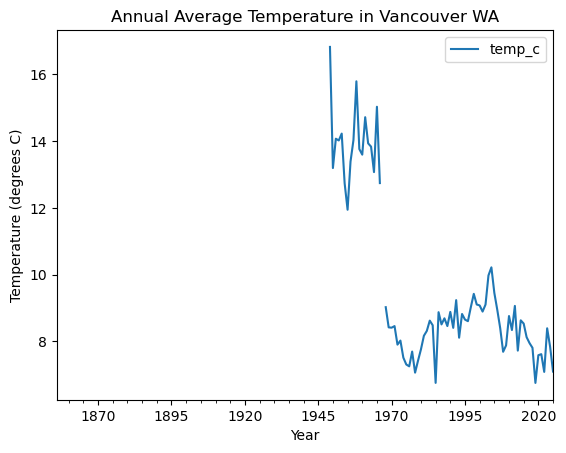

In [11]:
# Replot the annual data
van_ann_climate_df.plot(
    y='temp_c',
    title='Annual Average Temperature in Vancouver WA',
    xlabel='Year',
    ylabel='Temperature (degrees C)'
)

In [12]:
# Make an interactive plot
import hvplot.pandas

van_interactive = van_ann_climate_df.hvplot(
    y='temp_c',
    title='Annual Average Temperature in Vancouver WA'
).opts(
    xlabel='Year',
    ylabel='Temperature (degrees C)'
)
van_interactive

:Curve   [DATE]   (temp_c)

In [13]:
import holoviews as hv

hv.save(van_interactive, 'van_climate.html')

In [14]:
# Fit an OLS Linear Regression to the data
# Copy your annual climate DataFrame
df = van_ann_climate_df.copy().reset_index(drop=True)

# Build a Year column (data start is 1856)
df['Year'] = np.arange(1856, 1856 + len(df))

# Keep only rows from 1968 and later
df = df[df['Year'] >= 1968]

# Exclude a specific year 
# exclude_year = 1994          
# df = df[df['Year'] != exclude_year]

# Map Temperature to the correct column
df['Temperature'] = df['temp_c']

# Prepare arrays for scikit-learn
X = df[['Year']].values
y = df['Temperature'].values

# Fit the regression
model = LinearRegression()
model.fit(X, y)

# Get slope and R²
slope = model.coef_[0]
r_squared = model.score(X, y)

print(f"Slope (°C per year): {slope}")
print(f"R²: {r_squared:.4f}")


Slope (°C per year): -0.0004055253901535742
R²: 0.0001


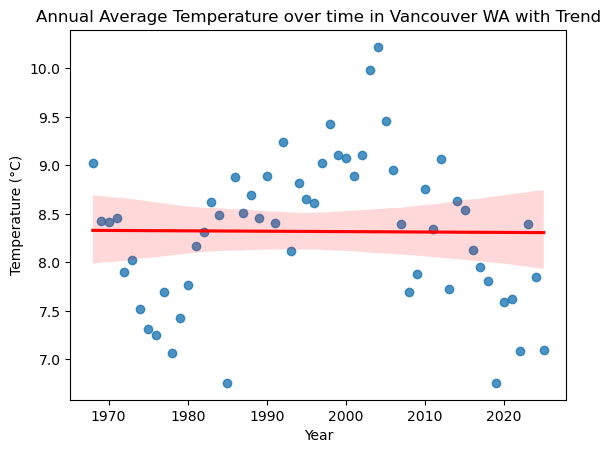

In [15]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x='Year',
    y='temp_c',
    data=df,
    line_kws={'color': 'red'}  # color for the trend line
)

ax.set(
    title='Annual Average Temperature over time in Vancouver WA with Trend',
    xlabel='Year',
    ylabel='Temperature (°C)'
)

plt.show()

### Vancouver Has Warmed ~X °C per Decade Since X

A linear OLS regression shows an average warming rate of **X °C per year** (≈ **X °C per decade**). While the R² value is low (**X**), indicating that year-to-year variability is large, the overall trend suggests a gradual rise in Vancouver’s annual average temperature since the mid-20th century.